In [1]:
import os
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import dates as mdates
import numpy as np
import seaborn as sns

import learning_lidar.generation.generate_density_utils as gen_den_utils
import learning_lidar.generation.generation_utils as gen_utils
import learning_lidar.preprocessing.preprocessing_utils as prep_utils
from KDE_estimation_sample import kde_estimation_main
from learning_lidar.generation.generate_LC_pattern import generate_LC_pattern_main
import learning_lidar.generation.generate_bg_signals_utils as gen_bg_utils
from learning_lidar.utils import utils, xr_utils, vis_utils, global_settings as gs
vis_utils.set_visualization_settings()
import learning_lidar.generation.valid_utils  as valid_utils
TIMEFORMAT = mdates.DateFormatter(r'%H')

In [4]:
station_name = 'haifa'
station = gs.Station(station_name)
figs_folder = r'C:\Users\addalin\Dropbox\Apps\Overleaf\ALiDAn\sup_images'
FORMAT_FIG='png'
SAVE_FIG = True
wavelengths = [355,532,1064]
sup_days= ['2017-04-04', '2017-05-16', '2017-10-15']
sns.set_context('talk')

C:\Users\addalin\Dropbox\Lidar\lidar_learning\learning_lidar\generation\valid_utils.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .82, 1])


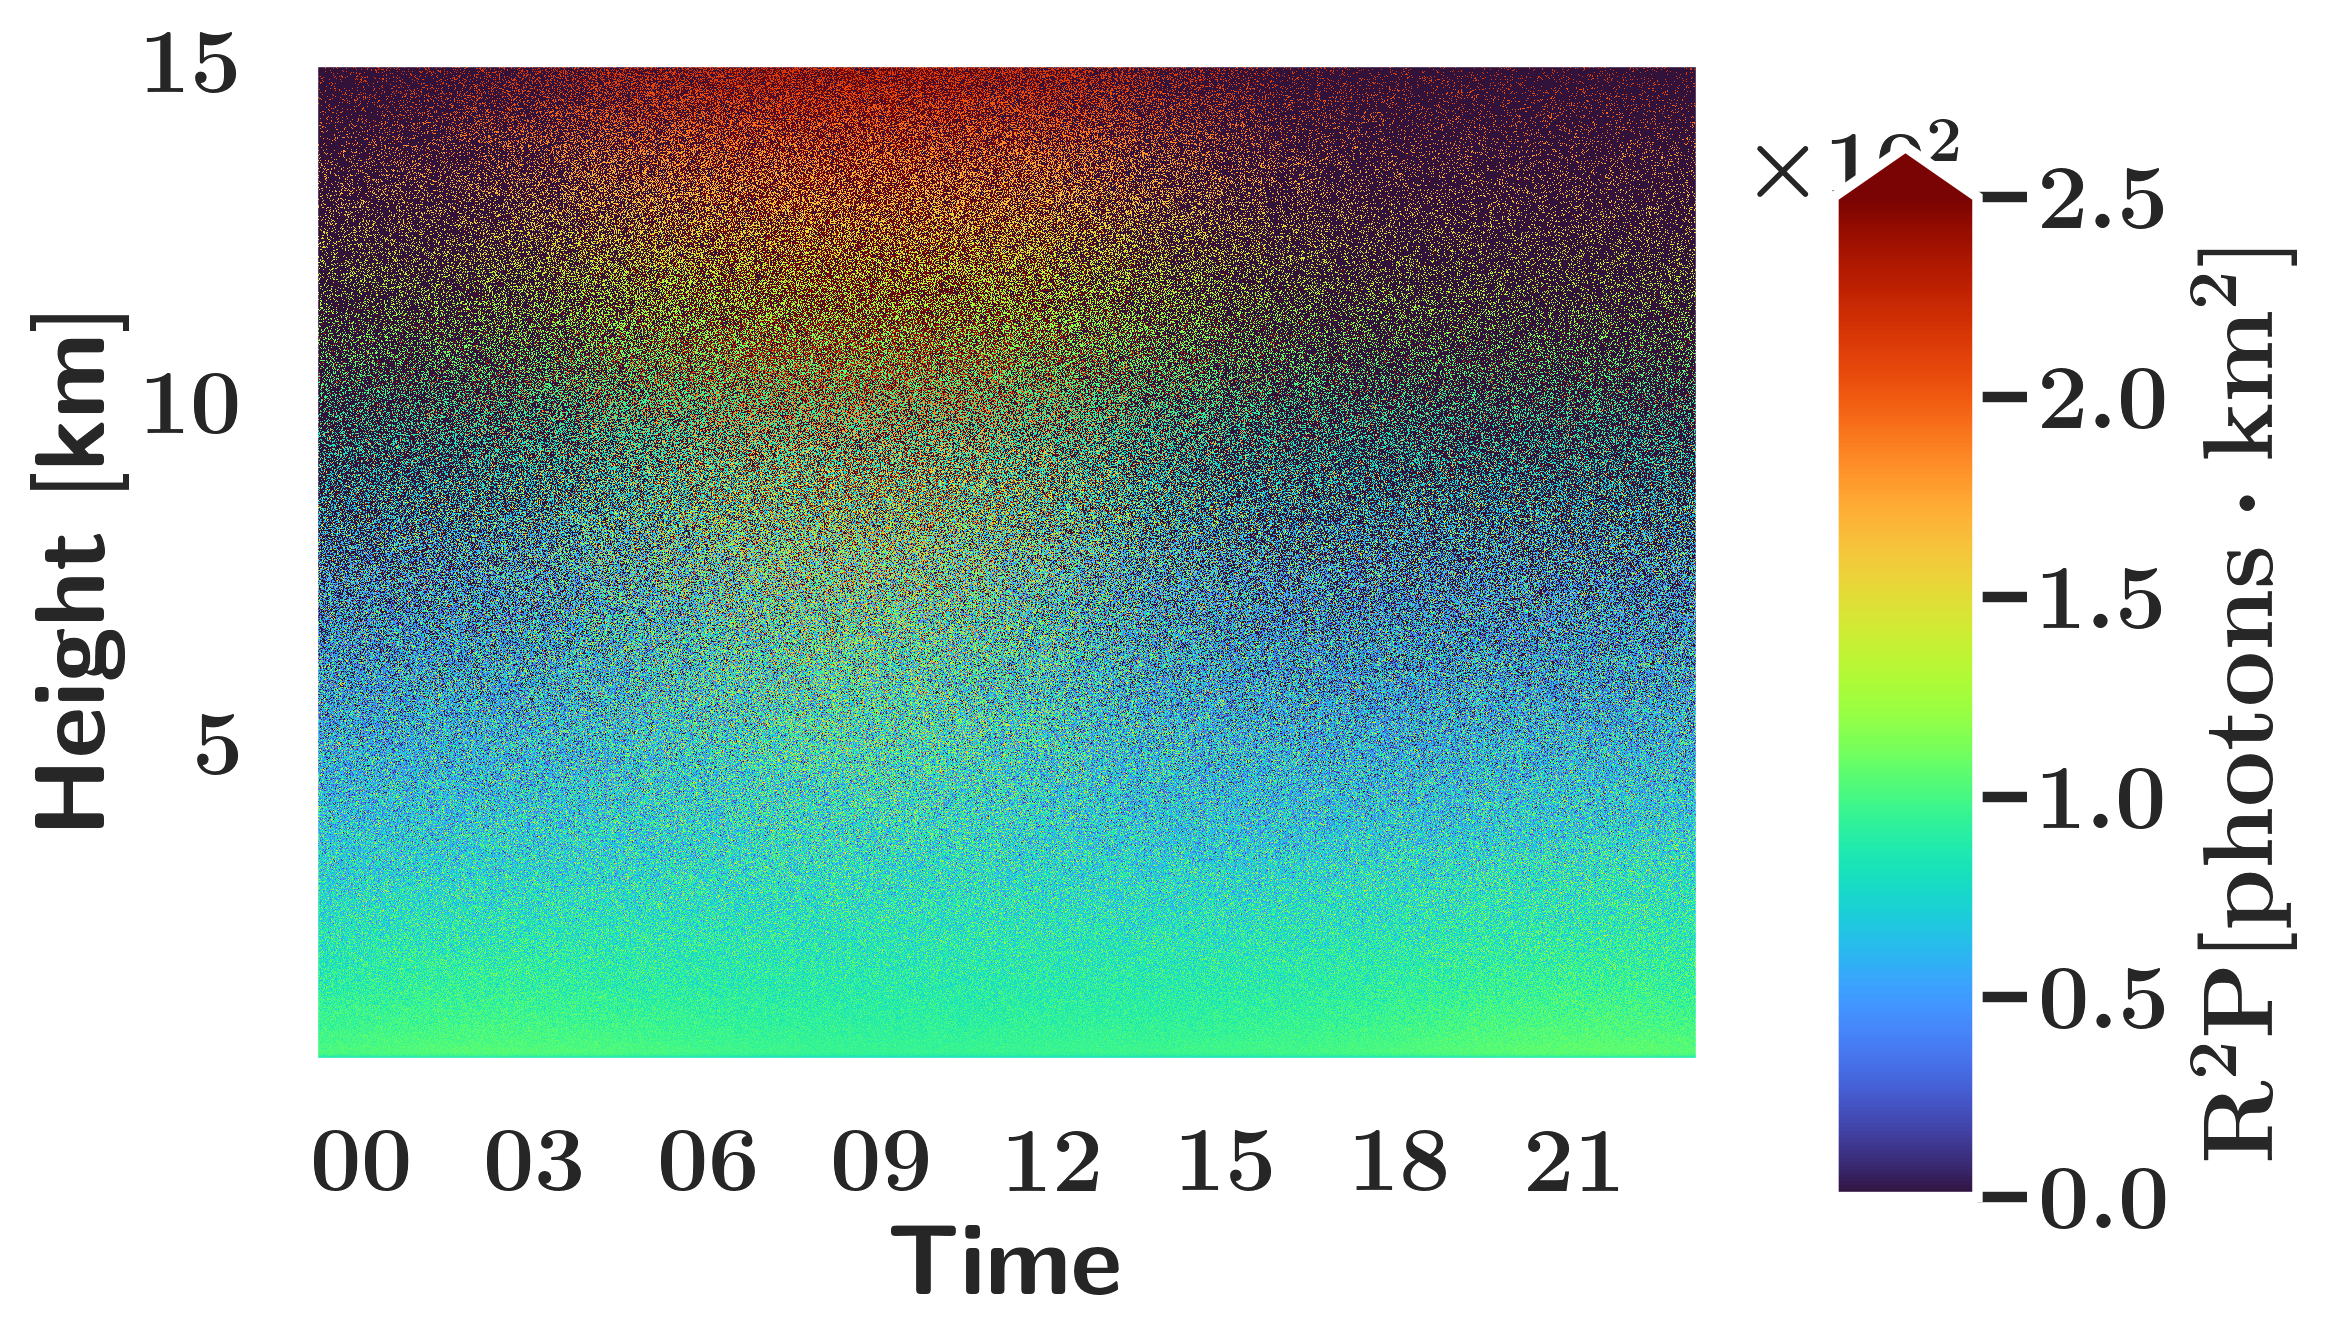

('C:\\Users\\addalin\\Dropbox\\Apps\\Overleaf\\ALiDAn\\sup_images\\lidar_532_2017-04-04.svg',
 <Figure size 2400x1500 with 2 Axes>,
 <AxesSubplot:xlabel='\\textbf{Time}', ylabel='\\textbf{Height} [$\\textbf{km}$]'>)

In [31]:
day_ = sup_days[0]
FORMAT_FIG='svg'
day_date = datetime.fromisoformat(day_)
figsize=(8,5)
wavelength =532
height_slice= slice(0,15)
aerosol_ds = gen_utils.get_daily_gen_ds(station, day_date, type_='aerosol')
signal_ds = gen_utils.get_daily_gen_ds(station, day_date, type_='signal')
lidar_ds = gen_utils.get_daily_gen_ds(station, day_date, type_='lidar')

sns.set_context('poster')

# for wavelength in wavelengths:
# fname = f'alpha_{wavelength}_{day_}'
# valid_utils.plot_daily_profile_for_publish(aerosol_ds.sigma.sel(Wavelength =wavelength),save_fig=SAVE_FIG,figsize=figsize,fname=fname,
#                                            height_slice=height_slice, threshold=0.119,
#                                        folder_name= figs_folder, format_fig=FORMAT_FIG,cbar_text=r'$\alpha [1/{\rm km}]$')

# fname = f'beta_attn_{wavelength}_{day_}'
# valid_utils.plot_daily_profile_for_publish(signal_ds.attbsc.sel(Wavelength =wavelength),save_fig=SAVE_FIG,figsize=figsize,fname=fname,
#                                            height_slice=height_slice,
#                                            folder_name= figs_folder, format_fig=FORMAT_FIG,cbar_text=r'$\beta_{\rm ATTN}[1/{\rm km \cdot sr}]$')
#
# fname = f'range_corr_{wavelength}_{day_}'
# valid_utils.plot_daily_profile_for_publish(signal_ds.range_corr.sel(Wavelength =wavelength),save_fig=SAVE_FIG,figsize=figsize,fname=fname,
#                                            height_slice=height_slice,
#                                            folder_name= figs_folder, format_fig=FORMAT_FIG,cbar_text=r'$\rm R^2P[\rm photons \cdot km^2]$')
#
fname = f'lidar_{wavelength}_{day_}'
valid_utils.plot_daily_profile_for_publish(lidar_ds.range_corr.sel(Wavelength =wavelength),save_fig=SAVE_FIG,figsize=figsize,fname=fname,
                                           height_slice=height_slice, threshold=250,
                                           folder_name= figs_folder, format_fig=FORMAT_FIG,cbar_text=r'${\rm R^2 P [photons \cdot km^2]}$')